In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Cleaning and Preparation

In [86]:
# Importing libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

In [87]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/pi-assignment-11/covid-data.csv')
# source: https://www.kaggle.com/datasets/meirnizri/covid19-dataset

In [88]:
# First few rows of the dataset
print('Initial dataset:')
df.head()

Initial dataset:


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


In [89]:
# Checking for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Remove duplicate rows
df = df.drop_duplicates()
print("Duplicates removed. Shape of the dataset:", df.shape)


Number of duplicate rows: 812049
Duplicates removed. Shape of the dataset: (236526, 21)


The dataset initially contained over 1 million records. After removing duplicates, the dataset size was reduced by approximately 75%, revealing that over 800,000 duplicates were present. 👾

In [90]:
# Handling missing values
# Missing values coded as 97 or 99, replacing them with NaN [this info is given in the dataset description in kaggle]
missing_values = [97, 99]
df.replace(missing_values, np.nan, inplace=True)

In [91]:
# Checking the percentage of missing values per column
missing_percent = df.isnull().mean() * 100
print("\nPercentage of missing values per column:")
print(missing_percent)


Percentage of missing values per column:
USMER                    0.000000
MEDICAL_UNIT             0.000000
SEX                      0.000000
PATIENT_TYPE             0.000000
DATE_DIED                0.000000
INTUBED                 44.556201
PNEUMONIA                3.038567
AGE                      0.086671
PREGNANT                54.752120
DIABETES                 0.000000
COPD                     0.000000
ASTHMA                   0.000000
INMSUPR                  0.000000
HIPERTENSION             0.000000
OTHER_DISEASE            0.000000
CARDIOVASCULAR           0.000000
OBESITY                  0.000000
RENAL_CHRONIC            0.000000
TOBACCO                  0.000000
CLASIFFICATION_FINAL     0.000000
ICU                     44.619196
dtype: float64


Here, we can observe that approximately half of the values for the features `INTUBED`, `PREGNANT`, and `ICU` are missing.

In [92]:
# Dropping columns with more than 40% threshold of missing values
threshold = 40
columns_to_drop = missing_percent[missing_percent > threshold].index
df.drop(columns=columns_to_drop, axis=1, inplace=True)
print(f"\nDropped columns with > {threshold}% missing values. Remaining columns: {list(df.columns)}")


Dropped columns with > 40% missing values. Remaining columns: ['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'PNEUMONIA', 'AGE', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL']


In [93]:
# All features (columns) with their data types
print("Features and their data types:")
print(df.dtypes)

Features and their data types:
USMER                     int64
MEDICAL_UNIT              int64
SEX                       int64
PATIENT_TYPE              int64
DATE_DIED                object
PNEUMONIA               float64
AGE                     float64
DIABETES                  int64
COPD                      int64
ASTHMA                    int64
INMSUPR                   int64
HIPERTENSION              int64
OTHER_DISEASE             int64
CARDIOVASCULAR            int64
OBESITY                   int64
RENAL_CHRONIC             int64
TOBACCO                   int64
CLASIFFICATION_FINAL      int64
dtype: object


In [94]:
# Filling missing values for numerical columns with the median
num_cols = df.select_dtypes(include=['float64']).columns # Only float type has missing values
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [95]:
# Standardizing boolean-like columns (e.g., 1/2 values to 1/0)
boolean_columns = [
    'SEX', 'PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
    'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
    'RENAL_CHRONIC', 'TOBACCO'
]

for col in boolean_columns:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: 1 if x == 1 else 0)

In [96]:
# Handling `CLASIFFICATION_FINAL` column
# 1-3 -> Positive; 4 and above -> Negative/Inconclusive
if 'CLASIFFICATION_FINAL' in df.columns:
    df['CLASIFFICATION_FINAL'] = df['CLASIFFICATION_FINAL'].apply(lambda x: 'Positive' if x in [1, 2, 3] else 'Negative/Inconclusive')

In [97]:
# Validating and formatting the `PATIENT_TYPE` column
# 1 -> Returned Home; 2 -> Hospitalization
if 'PATIENT_TYPE' in df.columns:
    df['PATIENT_TYPE'] = df['PATIENT_TYPE'].map({1: 'Returned Home', 2: 'Hospitalized'})

In [98]:
# Verifying dataset after formatting
print("Formatted dataset preview:")
df.head()

Formatted dataset preview:


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,Returned Home,03/05/2020,1,65.0,0,0,0,0,1,0,0,0,0,0,Positive
1,2,1,0,Returned Home,03/06/2020,1,72.0,0,0,0,0,1,0,0,1,1,0,Negative/Inconclusive
2,2,1,0,Hospitalized,09/06/2020,0,55.0,1,0,0,0,0,0,0,0,0,0,Positive
3,2,1,1,Returned Home,12/06/2020,0,53.0,0,0,0,0,0,0,0,0,0,0,Negative/Inconclusive
4,2,1,0,Returned Home,21/06/2020,0,68.0,1,0,0,0,1,0,0,0,0,0,Positive


In [99]:
# Saving the cleaned dataset
df.to_csv('cleaned-covid-dataset.csv', index=False)
print("\nCleaned dataset saved as 'cleaned-covid-dataset.csv'.")


Cleaned dataset saved as 'cleaned-covid-dataset.csv'.


# Data Analysis

## Patient distribution by age group

In [100]:
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0, 18, 35, 50, 65, 100],
                         labels=['0-18', '19-35', '36-50', '51-65', '65+'], right=False)
age_group_distribution = df['AGE_GROUP'].value_counts()

In [101]:
print("Age Group Distribution:")
print(age_group_distribution)

Age Group Distribution:
AGE_GROUP
51-65    70799
65+      67809
36-50    54857
19-35    32625
0-18     10256
Name: count, dtype: int64


The data shows an increasing number of records with age, peaking in the 51-65 and 65+ groups.

## Correlation between health conditions and hospitalization

In [102]:
health_conditions = ['PNEUMONIA', 'DIABETES', 'COPD', 'ASTHMA', 'HIPERTENSION',
                     'CARDIOVASCULAR', 'RENAL_CHRONIC', 'OBESITY', 'TOBACCO']
df['PATIENT_TYPE_NUM'] = df['PATIENT_TYPE'].map({'Returned Home': 0, 'Hospitalized': 1})
hospitalization_correlation = df[health_conditions + ['PATIENT_TYPE_NUM']].corr()['PATIENT_TYPE_NUM']

In [103]:
print("Correlation of Health Conditions with Hospitalization:")
print(hospitalization_correlation)

Correlation of Health Conditions with Hospitalization:
PNEUMONIA           0.488389
DIABETES            0.096386
COPD                0.012889
ASTHMA             -0.147028
HIPERTENSION        0.068523
CARDIOVASCULAR     -0.023794
RENAL_CHRONIC       0.040908
OBESITY            -0.069930
TOBACCO            -0.092115
PATIENT_TYPE_NUM    1.000000
Name: PATIENT_TYPE_NUM, dtype: float64


## Grouping by classification (Positive vs Negative/Inconclusive)

In [106]:
classification_summary = df.groupby('CLASIFFICATION_FINAL').agg({
    'AGE': ['mean', 'median'],
    'PATIENT_TYPE': lambda x: (x == 'Hospitalized').mean()
}).rename(columns={'PATIENT_TYPE': 'HOSPITALIZATION_RATE'})

In [107]:
print("Summary Statistics by Classification:")
print(classification_summary)

Summary Statistics by Classification:
                             AGE        HOSPITALIZATION_RATE
                            mean median             <lambda>
CLASIFFICATION_FINAL                                        
Negative/Inconclusive  49.949959   51.0             0.488137
Positive               55.445828   57.0             0.675155


# Data Visualization

In [108]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

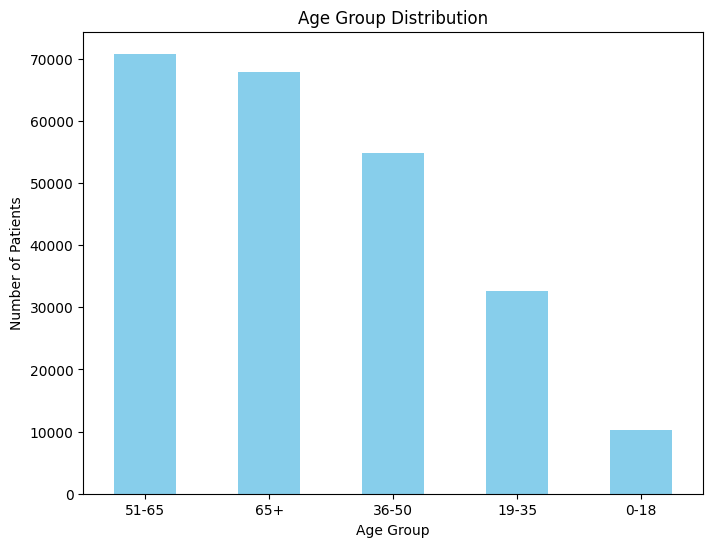

In [109]:
# Age group distribution
plt.figure(figsize=(8, 6))
age_group_distribution.plot(kind='bar', color='skyblue')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

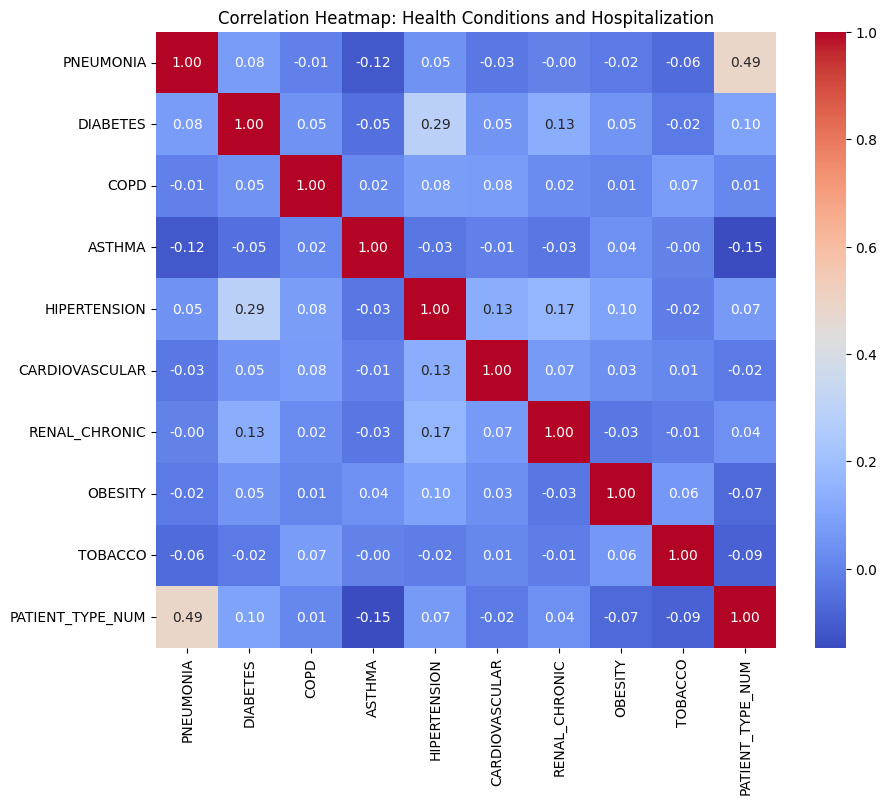

In [110]:
# Correlation heatmap for health conditions
plt.figure(figsize=(10, 8))
sns.heatmap(df[health_conditions + ['PATIENT_TYPE_NUM']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Health Conditions and Hospitalization')
plt.show()

<ipython-input-112-97af5e0a880e>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hospitalization_by_age_group = df.groupby('AGE_GROUP')['PATIENT_TYPE'].apply(lambda x: (x == 'Hospitalized').mean() * 100)


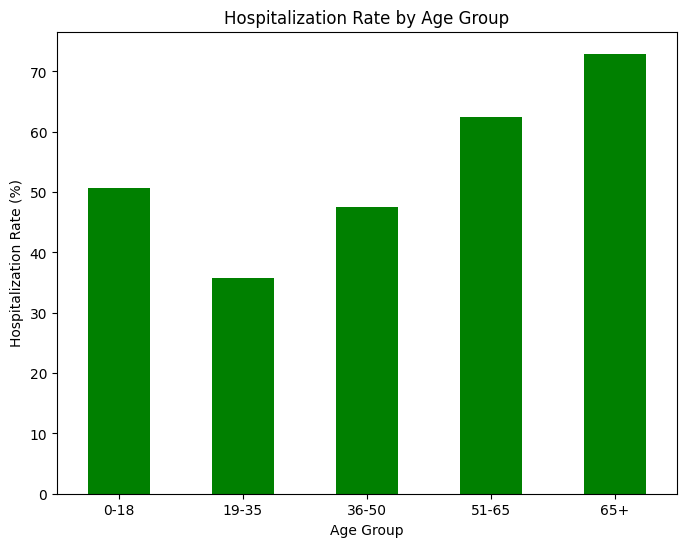

In [112]:
# Hospitalization Rate by Age Group
hospitalization_by_age_group = df.groupby('AGE_GROUP')['PATIENT_TYPE'].apply(lambda x: (x == 'Hospitalized').mean() * 100)
hospitalization_by_age_group.plot(kind='bar', color='green', figsize=(8, 6))
plt.title('Hospitalization Rate by Age Group')
plt.ylabel('Hospitalization Rate (%)')
plt.xlabel('Age Group')
plt.xticks(rotation=0)
plt.show()